In [5]:
from dispel4py.workflow_graph import WorkflowGraph 
from dispel4py.provenance import *
import time
import random
from dispel4py.base import create_iterative_chain, GenericPE, ConsumerPE, IterativePE, SimpleFunctionPE
from dispel4py.new.simple_process import process_and_return

class Source(GenericPE):

    def __init__(self):
        GenericPE.__init__(self)
        self._add_input('input')
        self._add_output('output')
        #self._add_input('input2')
        
    
    def _process(self,inputs):
        print inputs
        iter=None
        if 'input' in inputs:
            self.log('from input')
            iter=inputs['input'][0]
        if 'input2' in inputs:
            self.log('from input2')
            iter=inputs['input2'][0]
            
         
        #self.addToProv(0,metadata={'this':"mine"})
        
        while (iter>=5):
            #time.sleep(0.5)
            #val = random.random()
            self.write('output',iter,metadata={'iter':iter})
            iter=iter-10
        
        
        


def square(data,prov_cluster):
    data=data*data
    prov={'format':'Random float', 'metadata':{'value_s':str(data)}}
    
    return {'_d4p_prov':prov,'_d4p_data':data} 
    #return data


    
    
class Div(GenericPE):

    def __init__(self):
        GenericPE.__init__(self)
        self._add_input('input')
        self._add_output('output')
        self.prov_cluster='cluster'
         
        self.operands=[]
    
    def _process(self,data):
        #self.log("SSSSSS: "+str(data))
        self.operands.append(data['input'])
        #self.addToProv(0,metadata={'that':"yours"})
       
        val=0
        if (len(self.operands)==2):
            #time.sleep(0.5)
            val = self.operands[0]/self.operands[1]
            self.write('output',val,metadata={'val':val})
            self.log(val)
            self.operands=[]
            

    
    


sc = Source()
sc.name='PE_source'

squaref=SimpleFunctionPE(square,{'prov_cluster':'cluster'})
#squaref=SimpleFunctionPE(square)
divf=Div()
divf.name='PE_div'


#processes=[squaref,divf]
#chain = create_iterative_chain(processes, FunctionPE_class=SimpleFunctionPE)

#Initialise the graph
graph = WorkflowGraph()

#Common way of composing the graph
graph.connect(sc,'output',squaref,'input')
graph.connect(squaref,'output',divf,'input')
#graph.connect(divf,'output',squaref,'input')

# Alternatively with pipeline array
#Create pipelines from functions

#graph.connect(sc,'output',chain,'input')


graph.flatten()

#Prepare Input
input_data = {"PE_source": [{"input": [25]}]}

#Launch in simple process
process_and_return(graph, input_data)





SETTING NAME: Source
SETTING NAME: SimpleFunctionPE
SETTING NAME: Div
SETTING NAME: SimpleProcessingPE
{'input': [25]}
PE_source8: from input
PE_div10: 2
SimplePE: Processed 1 iteration.


{'PE_div10': {'output': [2]}}

In [7]:
ProvenanceRecorder.REPOS_URL='http://127.0.0.1:8082/workflow/insert'
rid='RDWD_'+getUniqueId()

os.environ['PROV_PATH']="./prov-files/"
InitiateNewRun(graph,ProvenanceRecorderToServiceWFeedback,provImpClass=ProvenancePE,username='aspinuso',runId=rid,w3c_prov=False,workflowName="test_rdwd",workflowId="xx",clustersRecorders={'cluster':ProvenanceRecorderToServiceWFeedback},feedbackPEs=['PE_div'])


#from IPython.display import HTML
#HTML("<iframe src='http://127.0.01:8080/provenance-explorer/html/d3js.jsp?level=PE&runId="+rid+"' width=800 height=800></iframe>")

SETTING NAME: NewWorkflowRun
SETTING NAME: ProvenanceRecorderToServiceWFeedback
Inputs: {'NewWorkflowRun': [{'input': 'None'}]}
SETTING NAME: SimpleProcessingPE
RUN Metadata: {'username': 'aspinuso', 'workflowId': 'xx', 'description': '', 'mapping': '-f', 'system_id': None, 'runId': 'RDWD_orfeus-as-93101-3efe4697-030f-11e6-aabd-f45c89acf865', 'startTime': '2016-04-15 13:37:49.763409', 'input': [], '_id': 'RDWD_orfeus-as-93101-3efe4697-030f-11e6-aabd-f45c89acf865', 'type': 'workflow_run', 'workflowName': 'test_rdwd'}
ProvenanceRecorderToServiceWFeedback12: progress: (200, 'OK', <httplib.HTTPResponse instance at 0x104360c68>, '{"inserts": [{"error": "could not connect to 127.0.0.1:27017: [Errno 61] Connection refused"}], "success": true}')
SimplePE: Processed 1 iteration.
Outputs: {}
Change grouping implementation 
Change grouping implementation 
Injecting provenance to: PE_div Original type: (<class 'dispel4py.core.GenericPE'>,)
Injecting provenance to: PE_div Transoformed: <class 'disp

'RDWD_orfeus-as-93101-3efe4697-030f-11e6-aabd-f45c89acf865'

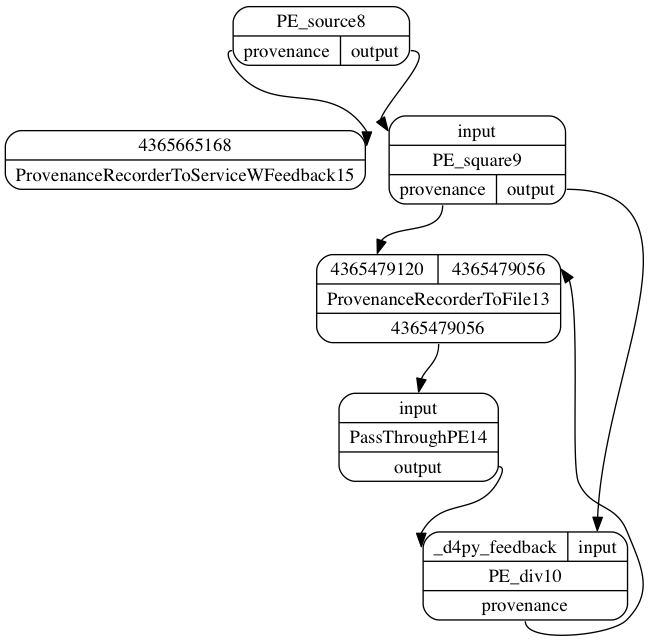

In [8]:
from dispel4py.visualisation import display

display(graph)

In [13]:
simple_process.process_and_return(graph, input_data)

SETTING NAME: SimpleProcessingPE
{'input': [25]}
PE_source14: from input
PE_div16: 0
PE_div16: STATEFUL CAPTURE: 
PE_div16: 9
SimplePE: Processed 1 iteration.


{'PE_div16': {'output': [{'TriggeredByProcessIterationID': 'PE_div-orfeus-as-85724-d27f90fd-0222-11e6-ae4c-f45c89acf865',
    '_d4p': 0,
    'id': 'orfeus-as-85724-d27f925c-0222-11e6-b951-f45c89acf865'},
   {'TriggeredByProcessIterationID': 'PE_div-orfeus-as-85724-d27f9f3d-0222-11e6-97d1-f45c89acf865',
    '_d4p': 9,
    'id': 'orfeus-as-85724-d27fa038-0222-11e6-a6f8-f45c89acf865'}]}}